# Election Data by Congressional District

### cleaning and sorting

In [ ]:
import pandas as pd
import numpy as np

In [2]:
# https://electionlab.mit.edu/data#data

In [3]:
df2 = pd.read_csv('1976-2016-house.csv')

In [5]:
df2_year = df2.loc[df2['year']>=2016]

In [8]:
df2_year.loc[df2_year['candidate']=='Ryan Greene', 'party'] ='democrat'
# had to manually set value after discovering party info was not properly imported in file for state of Arizona

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [9]:
df2_year.loc[df2_year['candidate']=='Liz Cheney', 'party'] ='republican'
# had to manually set value after discovering party info was not properly imported in file for state of Arizona

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [10]:
df2_party_rep = df2_year.loc[df2_year['party']=='republican']
#pulling all republican votes out of dataframe

In [12]:
df2_party_dem = df2_year.loc[df2_year['party']=='democrat']
#pulling all democratic votes out of dataframe

In [16]:
df2_concat = pd.concat([df2_party_dem, df2_party_rep])
df2_concat.sort_values(['state','district']);
#merging all democrat and republican rows and then sorting by state and district

In [17]:
df2_concat = df2_concat.drop(['state_fips', 'state_cen', 'state_ic', 'office', 'stage', 'special', 'candidate', 'writein', 'version', 'totalvotes', 'year'], axis=1)

In [18]:
df2_sort = df2_concat.sort_values(['state','district'])

In [20]:
df2_sort['totalvotes'] = df2_sort.groupby(['state', 'district']).candidatevotes.transform('sum')
# summing total candidate votes by state and district

In [21]:
df2_sort['candidatevotes_combined'] = df2_sort.groupby(['state','district','party']).candidatevotes.transform('sum')
#summing total candidate votes by state and district and party

In [22]:
df2_sort = df2_sort[['state','district','party','candidatevotes_combined','totalvotes']].drop_duplicates()
#dropping duplicates rows after sorted by state/district/party. there were multiple democratic/republican votes
#for single districts in some cases

In [23]:
df2_sort['per_vote'] = np.round(np.where(df2_sort['candidatevotes_combined'] > 0, df2_sort['candidatevotes_combined']/df2_sort['totalvotes'], 0), 4)
#creating a % of vote column for each party

,state,district,party,candidatevotes_combined,totalvotes,per_vote
358,Alabama,1,republican,208083,208083,1.0000
174,Alabama,2,democrat,112089,246975,0.4538
497,Alabama,2,republican,134886,246975,0.5462
463,Alabama,3,democrat,94549,286713,0.3298
425,Alabama,3,republican,192164,286713,0.6702
351,Alabama,4,republican,235925,235925,1.0000
352,Alabama,5,democrat,102234,307881,0.3321
278,Alabama,5,republican,205647,307881,0.6679
265,Alabama,6,democrat,83709,329022,0.2544
281,Alabama,6,republican,245313,329022,0.7456


In [25]:
df2_sort['congdist'] = df2_sort['state'].map(str) + df2_sort['district'].astype(str)
# dataframe["period"] = dataframe["Year"].map(str) + dataframe["quarter"]
#creates congdist column that include the state name and district number (ex. 'Alabama1')

In [28]:
df2_final = df2_sort.drop(['candidatevotes_combined','totalvotes'], axis=1)
#drop combined votes column after getting the percent totals it is no longer needed

In [30]:
dem_vote = df2_final['dem_vote'] = np.where(df2_final['party'] == 'democrat', df2_final['per_vote'], 0)
#creates dem_vote column

In [31]:
rep_vote = df2_final['rep_vote'] = np.where(df2_final['party'] == 'republican', df2_final['per_vote'], 0)
#creates rep_vote column

In [32]:
df2_final['rep_vote']= np.where((df2_final['party'] == 'democrat') & (df2_final['rep_vote'] == 0) & df2_final['dem_vote'] != 0, 1 - df2_final['dem_vote'],rep_vote)
#begins process of getting both rep and dem votes on single line for a state and district

In [33]:
df2_final['dem_vote']= np.where((df2_final['party'] == 'republican') & (df2_final['dem_vote'] == 0) & df2_final['rep_vote'] != 0, 1 - df2_final['rep_vote'],dem_vote)
#finishes process of getting both rep and dem votes on single line for a state and district

In [34]:
df2_final['dem_vote'] = df2_final['dem_vote'].round(4)

In [35]:
df2_final['rep_vote'] = df2_final['rep_vote'].round(4)

In [37]:
df2_final = df2_final[['state','district','congdist','dem_vote','rep_vote']].drop_duplicates().reset_index().drop(columns = 'index')
#drops duplicates from dataframe

,state,district,congdist,dem_vote,rep_vote
0,Alabama,1,Alabama1,0.0000,1.0000
1,Alabama,2,Alabama2,0.4538,0.5462
2,Alabama,3,Alabama3,0.3298,0.6702
3,Alabama,4,Alabama4,0.0000,1.0000
4,Alabama,5,Alabama5,0.3321,0.6679
5,Alabama,6,Alabama6,0.2544,0.7456
6,Alabama,7,Alabama7,1.0000,0.0000
7,Alaska,0,Alaska0,0.4172,0.5828
8,Arizona,1,Arizona1,0.5388,0.4612
9,Arizona,2,Arizona2,0.4304,0.5696


## setting indepedent vars

### sex percentage

In [40]:
# https://factfinder.census.gov/faces/nav/jsf/pages/searchresults.xhtml?refresh=t

In [41]:
df3 = pd.read_csv('ACS_16_1YR_S0101_with_ann.csv')

In [44]:
drop_first = df3.drop(0)

In [45]:
d_f = drop_first['GEO.display-label'][:-1]

In [51]:
def state_num():
    split_list = []
    #finds the district number for each district
    for x in d_f:
        s = x.split(' ')[2]
        if s == '(at':
            s = '0'
        else:
            s         
        split_list.append(s)
        
    name_list = []
    #finds the state name
    for y in d_f:
        n = y.split(', ')[1]
        name_list.append(n)
        
    zip_list = list(zip(name_list, split_list))
        
    final_list = []
    #combines state and district number
    for a,b in zip_list:
        final_list.append("".join((a,b)))
    
    return final_list
    
state_num();


In [53]:
total_pop = df3['HC01_EST_VC01'][1:-1].astype(int)
#getting data and setting as type int

In [54]:
male_pop = df3['HC02_EST_VC01'][1:-1].astype(int)

In [55]:
female_pop = df3['HC03_EST_VC01'][1:-1].astype(int)

In [56]:
pop_list = list(zip(state_num(), total_pop, male_pop, female_pop, round(male_pop/total_pop,4), round(female_pop/total_pop,4)))
#combining relevant data

In [57]:
df_pop = pd.DataFrame(pop_list, columns=['congdist','totalpop','malepop','femalepop','malepopper','femalepopper'])
#creating dataframe and assigning column titles

In [58]:
df_s_and_p = df_pop.drop(['totalpop', 'malepop', 'femalepop'], axis=1)
#dropping irrelevant columns

In [60]:
df_state_and_pop = pd.merge(df2_final, df_s_and_p, on=['congdist'], how='inner')
#merging tables

In [62]:
pd.plotting.scatter_matrix(df_state_and_pop, figsize=[20,12]);

### median age

In [63]:
df4 = pd.read_csv('ACS_16_1YR_B01002_with_ann.csv')

In [65]:
median_age = df4['HD01_VD02'][1:-1]

In [66]:
age_list = list(zip(state_num(), median_age))

In [67]:
df_al = pd.DataFrame(age_list, columns=['congdist','avg_age'])

In [68]:
df_final2 = pd.merge(df_state_and_pop, df_al, on=['congdist'], how='inner')

### Ethnicity

In [71]:
df5 = pd.read_csv('ACS_16_5YR_DP05_with_ann.csv')

In [74]:
white_per = df5['HC03_VC49'][1:-1].astype(float)

In [75]:
black_per = df5['HC03_VC50'][1:-1].astype(float)

In [76]:
asian_per = df5['HC03_VC56'][1:-1].astype(float)

In [77]:
hisp_lat_per = df5['HC03_VC88'][1:-1].astype(float)

In [78]:
ethnicity_per = list(zip(state_num(), white_per.div(100).round(4), black_per.div(100).round(4), asian_per.div(100).round(4), hisp_lat_per.div(100).round(4)))

In [79]:
df_ep = pd.DataFrame(ethnicity_per, columns=['congdist','white_per','black_per','asian_per','latino_per'])

In [80]:
df_final3 = pd.merge(df_final2, df_ep, on=['congdist'], how='inner')

### urban/rural

In [82]:
df6 = pd.read_csv('DEC_10_115_P2_with_ann.csv')

In [84]:
ur_drop = df6['GEO.display-label'][1:-1]

In [87]:
def urban_congdist():
    #had to repeat finding state and district number because there was not a complete list of all 435 districts
    split_list = []
    for x in ur_drop:
        s = x.split(' ')[2]
        if s == '(at':
            s = '0'
        else:
            s         
        split_list.append(s)
        
    name_list = []
    for y in ur_drop:
        n = y.split(', ')[1]
        name_list.append(n)
        
    zip_list = list(zip(name_list, split_list))
        
    final_list = []
    for a,b in zip_list:
        final_list.append("".join((a,b)))
    
    return final_list
    
urban_congdist();

In [88]:
urban_list = df6['D002'][1:-1].astype(int)

In [89]:
rural_list = df6['D005'][1:-1].astype(int)

In [90]:
ur_per = list(zip(urban_congdist(), urban_list, rural_list))

In [91]:
df_ur = pd.DataFrame(ur_per, columns=['congdist','urbanpop','ruralpop'])

In [92]:
df_ur['totalpop'] = df_ur.sum(axis=1)
# dem_vote = df2_final['dem_vote'] = np.where(df2_final['party'] == 'democrat', df2_final['per_vote'], 0)

In [94]:
df_ur['urban_per'] = round(df_ur['urbanpop']/df_ur['totalpop'],4)

In [95]:
df_ur['rural_per'] = round(df_ur['ruralpop']/df_ur['totalpop'],4)

In [96]:
df_ur = df_ur.drop(['urbanpop','ruralpop','totalpop'], axis=1);

In [98]:
df_final4 = pd.merge(df_final3, df_ur, on=['congdist'], how='inner')

# adding in D/R column

In [100]:
df_final4['D/R'] = np.where((df_final4['dem_vote']>.5),0,1)
# 0 = democrat  1 = republican

In [102]:
df_final4['D/R_scale'] = np.where((df_final4['D/R'] == 0), .5 - (df_final4['dem_vote']/2), .5 + df_final4['rep_vote']/2)
#creates a scale where 0=democrate and 1=republican so that all votes can be scaled on a 0 to 1 basis

### school

In [104]:
df7 = pd.read_csv('ACS_16_1YR_B06009_with_ann.csv')

In [106]:
less_hs = df7['HD01_VD03'][1:-1].astype(int)

In [107]:
hs = df7['HD01_VD04'][1:-1].astype(int)

In [108]:
some_college = df7['HD01_VD05'][1:-1].astype(int)

In [109]:
bach_degree = df7['HD01_VD06'][1:-1].astype(int)

In [110]:
grad_degree = df7['HD01_VD07'][1:-1].astype(int)

In [111]:
tot_school = df7['HD01_VD01'][1:-1].astype(int)

In [112]:
school_per = list(zip(state_num(), less_hs, hs, some_college, bach_degree, grad_degree, tot_school))

In [113]:
df_sp = pd.DataFrame(school_per, columns=['congdist', 'less_hs', 'hs', 'some_college', 'bach_degree', 'grad_degree', 'tot_school'])

In [115]:
df_sp['less_hs_per'] = round(df_sp['less_hs']/df_sp['tot_school'],4)

In [116]:
df_sp['hs_per'] = round(df_sp['hs']/df_sp['tot_school'],4)

In [117]:
df_sp['some_college_per'] = round(df_sp['some_college']/df_sp['tot_school'],4)

In [118]:
df_sp['bach_degree_per'] = round(df_sp['bach_degree']/df_sp['tot_school'],4)

In [119]:
df_sp['grad_degree_per'] = round(df_sp['grad_degree']/df_sp['tot_school'],4)

In [121]:
df_sp = df_sp.drop(['less_hs','hs','some_college','bach_degree','grad_degree','tot_school'], axis=1)

In [123]:
df_final5 = pd.merge(df_final4, df_sp, on=['congdist'], how='left')

### foreign citizens

In [125]:
df8 = pd.read_csv('ACS_16_1YR_B05002_with_ann.csv')

In [127]:
total_citizens = df8['HD01_VD01'][1:-1].astype(int)

In [128]:
native_citizens = df8['HD01_VD02'][1:-1].astype(int)

In [129]:
foreign_citizens = df8['HD01_VD13'][1:-1].astype(int)

In [130]:
citizens_per = list(zip(state_num(), native_citizens, foreign_citizens, total_citizens))

In [131]:
df_cp = pd.DataFrame(citizens_per, columns=['congdist', 'natcit', 'forcit', 'totcit'])

In [133]:
df_cp['foreign_per'] = round(df_cp['forcit']/df_cp['totcit'],4)

In [134]:
df_cp['native_per'] = round(df_cp['natcit']/df_cp['totcit'],4)

In [136]:
df_cp = df_cp.drop(['totcit', 'natcit', 'forcit'], axis=1)

In [138]:
df_final6 = pd.merge(df_final5, df_cp, on=['congdist'], how='left')

### pop over 65

In [140]:
df9 = pd.read_csv('ACS_16_1YR_S0103_with_ann.csv')

In [142]:
total_pop_65 = df9['HC01_EST_VC01'][1:].astype(int)

In [143]:
vet_pop = df9['HC02_EST_VC01'][1:].astype(int)

In [144]:
vet_drop = df9['GEO.display-label'][1:]

In [145]:
def vet_congdist():
    #had to recreate state and district number because total district list did not equal 435
    split_list = []
    for x in vet_drop:
        s = x.split(' ')[2]
        if s == '(at':
            s = '0'
        else:
            s         
        split_list.append(s)
        
    name_list = []
    for y in vet_drop:
        n = y.split(', ')[1]
        name_list.append(n)
        
    zip_list = list(zip(name_list, split_list))
        
    final_list = []
    for a,b in zip_list:
        final_list.append("".join((a,b)))
    
    return final_list
    
vet_congdist();

In [146]:
vets_per = list(zip(vet_congdist(), total_pop_65, vet_pop))

In [147]:
df_vp = pd.DataFrame(vets_per, columns=['congdist','totalpop','vetpop'])

In [149]:
df_vp['over_65_per'] = round(df_vp['vetpop']/df_vp['totalpop'],4)

In [151]:
df_vp = df_vp.drop(['totalpop', 'vetpop'], axis=1)

In [153]:
df_final7 = pd.merge(df_final6, df_vp, on=['congdist'], how='left')

### food stamps

In [156]:
df10 = pd.read_csv('ACS_17_1YR_B19058_with_ann.csv')

In [158]:
total_houses = df10['HD01_VD01'][1:-1].astype(int)

In [159]:
cash_asst = df10['HD01_VD02'][1:-1].astype(int)

In [160]:
cash_per = list(zip(state_num(), total_houses, cash_asst))

In [162]:
df_cap = pd.DataFrame(cash_per, columns=['congdist', 'totalpop', 'cashpop'])

In [164]:
df_cap['cash_asst_per'] = round(df_cap['cashpop']/df_cap['totalpop'],4)

In [166]:
df_cap = df_cap.drop(['totalpop', 'cashpop'], axis=1)

In [168]:
df_final8 = pd.merge(df_final7, df_cap, on=['congdist'], how='left')

# additional independent variables 

In [170]:
marital_add= pd.read_csv('ACS_16_1YR_maritalstatus_with_ann.csv')
marriage_per= marital_add['HC02_EST_VC01'][1:-1].astype(float)
marriage_list= list(zip(state_num(), marriage_per.div(100).round(4)))
df_mp= pd.DataFrame(marriage_list, columns = ['congdist', 'marriage_per'])
df_final9= pd.merge(df_final8, df_mp, on= ['congdist'], how= 'left')

In [172]:
employ_per = pd.read_csv('ACS_16_1YR_S2301_with_ann.csv')
employee_per = employ_per['HC03_EST_VC01'][1:-1].astype(float)
employee_per_list= list(zip(state_num(), employee_per.div(100).round(4)))
df_ep= pd.DataFrame(employee_per_list, columns = ['congdist', 'employee_per'])
df_final10= pd.merge(df_final9, df_ep, on= ['congdist'], how= 'left')

unemploy_per= employ_per['HC04_EST_VC01'][1:-1].astype(float)
unemployee_per_list= list(zip(state_num(), unemploy_per.div(100).round(4)))
df_uep= pd.DataFrame(unemployee_per_list, columns = ['congdist', 'unemployee_per'])
df_final11= pd.merge(df_final10, df_uep, on= ['congdist'], how= 'left')

In [174]:
median_income = pd.read_csv('ACS_16_1YR_medianincome_with_ann.csv')
med_income= median_income['HC02_EST_VC02'][1:-1].astype(float)
median_income_list= list(zip(state_num(), med_income))
df_md_inc= pd.DataFrame(median_income_list, columns = ['congdist', 'median_income'])
df_final12= pd.merge(df_final11, df_md_inc, on= ['congdist'], how= 'left')

In [176]:
internet = pd.read_csv('ACS_16_1YR_internet_with_ann.csv')
internet_1= internet['HC05_EST_VC01'][1:-1].astype(float)
internet_2 = internet['HC07_EST_VC01'][1:-1].astype(float)
no_internet_total = sum([internet_1, internet_2])
no_internet_list= list(zip(state_num(), no_internet_total.div(100).round(4)))
df_no_int= pd.DataFrame(no_internet_list, columns = ['congdist', 'no_int_per'])
df_final13= pd.merge(df_final12,df_no_int, on= ['congdist'], how= 'left')

In [178]:
rent= pd.read_csv('ACS_16_1YR_renter_with_ann.csv')
rent1= rent['HD01_VD03'][1:-1].astype(float)
total_house= rent['HD01_VD01'][1:-1].astype(float)
per_rent= rent1/total_house
per_rent1 = np.round(per_rent,4)
rent_list= list(zip(state_num(), per_rent))
df_per_rent= pd.DataFrame(rent_list, columns = ['congdist', 'per_rent'])
df_final14= pd.merge(df_final13, df_per_rent, on= ['congdist'], how= 'left')

## creates division column

In [179]:
division_dict = {1: ('Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont'), 2: ('New Jersey', 'New York', 'Pennsylvania'), 3: ('Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin'), 4: ('Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'), 5: ('Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'District of Columbia', 'West Virginia'), 6: ('Alabama', 'Kentucky', 'Mississippi', 'Tennessee'), 7: ('Arkansas', 'Louisiana', 'Oklahoma', 'Texas'), 8: ('Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming'), 9: ('Alaska', 'California', 'Hawaii', 'Oregon', 'Washington')}

In [180]:
division_dict.items()

dict_items([(1, ('Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont')), (2, ('New Jersey', 'New York', 'Pennsylvania')), (3, ('Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin')), (4, ('Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota')), (5, ('Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'District of Columbia', 'West Virginia')), (6, ('Alabama', 'Kentucky', 'Mississippi', 'Tennessee')), (7, ('Arkansas', 'Louisiana', 'Oklahoma', 'Texas')), (8, ('Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming')), (9, ('Alaska', 'California', 'Hawaii', 'Oregon', 'Washington'))])

In [183]:
def assign_division():
    state_div = []
    for x in df_final14['state']:
        state_div.append([k for k, v in division_dict.items() if x in v])
    return state_div

div = assign_division()
#function to assign states to divisions by region in us

In [184]:
df_final14['division'] = div
#creates division column and assigns division number to appropriate state

In [186]:
df_final14['division'] = df_final14['division'].map(lambda x: x[0])
#changing numbers from [6] to 6 format

## final revisions to dataframe

In [189]:
df_final14 = df_final14.fillna(df_final14.mean());
#fill in null values with mean of column

In [190]:
# df_final14.isnull().any()
#checks to make sure there are no null values remaining

In [192]:
df_final14 = df_final14[df_final14['D/R_scale'] != 1]
#getting rid of uncontested districts

In [193]:
df_final14 = df_final14[df_final14['D/R_scale'] != 0]
#getting rid of uncontested districts

In [196]:
df_final_drop = df_final14.drop(['state','district','congdist','dem_vote','rep_vote','malepopper','rural_per', 'D/R'], axis=1)
#drops unecessary columns
df_final_drop = df_final_drop.astype(float)
#changes all values types to float

,femalepopper,avg_age,white_per,black_per,asian_per,latino_per,urban_per,D/R_scale,less_hs_per,hs_per,some_college_per,bach_degree_per,grad_degree_per,foreign_per,native_per,over_65_per,cash_asst_per,marriage_per,employee_per,unemployee_per
1,0.5122,38.2,0.647,0.309,0.011,0.035,0.5471,0.77310,0.1608,0.3192,0.3021,0.1386,0.0794,0.0257,0.9743,0.1613,0.1606,0.494,0.530,0.066
2,0.5139,38.3,0.701,0.254,0.016,0.029,0.5024,0.83510,0.1636,0.3052,0.3035,0.1356,0.0920,0.0278,0.9722,0.1547,0.1418,0.516,0.504,0.061
4,0.5074,40.1,0.767,0.172,0.016,0.049,0.6553,0.83395,0.1358,0.2799,0.2816,0.1847,0.1180,0.0435,0.9565,0.1578,0.1287,0.528,0.592,0.044
5,0.5170,39.0,0.796,0.147,0.017,0.049,0.6917,0.87280,0.0991,0.2480,0.2855,0.2273,0.1401,0.0476,0.9524,0.1544,0.0734,0.336,0.495,0.109
7,0.4735,33.5,0.656,0.033,0.060,0.067,0.6602,0.79140,0.0689,0.2796,0.3559,0.1897,0.1059,0.0773,0.9227,0.1022,0.1334,0.440,0.463,0.090


In [197]:
df_final_drop.info();
#checks all values are now floats

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 1 to 434
Data columns (total 24 columns):
femalepopper        374 non-null float64
avg_age             374 non-null float64
white_per           374 non-null float64
black_per           374 non-null float64
asian_per           374 non-null float64
latino_per          374 non-null float64
urban_per           374 non-null float64
D/R_scale           374 non-null float64
less_hs_per         374 non-null float64
hs_per              374 non-null float64
some_college_per    374 non-null float64
bach_degree_per     374 non-null float64
grad_degree_per     374 non-null float64
foreign_per         374 non-null float64
native_per          374 non-null float64
over_65_per         374 non-null float64
cash_asst_per       374 non-null float64
marriage_per        374 non-null float64
employee_per        374 non-null float64
unemployee_per      374 non-null float64
median_income       374 non-null float64
no_int_per          374 non-null f

In [198]:
df_final_drop = df_final_drop.rename(columns={'D/R_scale':'D_R_scale'})
#changes / to _ in DR_scale column - was causing a problem when running models

,femalepopper,avg_age,white_per,black_per,asian_per,latino_per,urban_per,D_R_scale,less_hs_per,hs_per,some_college_per,bach_degree_per,grad_degree_per,foreign_per,native_per,over_65_per,cash_asst_per,marriage_per,employee_per,unemployee_per
1,0.5122,38.2,0.647,0.309,0.011,0.035,0.5471,0.77310,0.1608,0.3192,0.3021,0.1386,0.0794,0.0257,0.9743,0.1613,0.1606,0.494,0.530,0.066
2,0.5139,38.3,0.701,0.254,0.016,0.029,0.5024,0.83510,0.1636,0.3052,0.3035,0.1356,0.0920,0.0278,0.9722,0.1547,0.1418,0.516,0.504,0.061
4,0.5074,40.1,0.767,0.172,0.016,0.049,0.6553,0.83395,0.1358,0.2799,0.2816,0.1847,0.1180,0.0435,0.9565,0.1578,0.1287,0.528,0.592,0.044
5,0.5170,39.0,0.796,0.147,0.017,0.049,0.6917,0.87280,0.0991,0.2480,0.2855,0.2273,0.1401,0.0476,0.9524,0.1544,0.0734,0.336,0.495,0.109
7,0.4735,33.5,0.656,0.033,0.060,0.067,0.6602,0.79140,0.0689,0.2796,0.3559,0.1897,0.1059,0.0773,0.9227,0.1022,0.1334,0.440,0.463,0.090


In [200]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import statsmodels as stats
import statsmodels.formula.api as smf

In [201]:
df_final_vars = df_final_drop.drop(['D_R_scale'], axis=1)
#all variables - dropped columns

In [202]:
df_final_target = df_final_drop['D_R_scale']
#just the target value

In [203]:
df_final_vars_describe = df_final_vars.describe()
#describe() of all variables - target value

In [204]:
col_names = df_final_drop.describe().columns.drop(['D_R_scale'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(df_final_vars_describe):
    f = 'D_R_scale~' + val
    model = smf.ols(formula=f, data=df_final_drop).fit()
    X_new = pd.DataFrame({val: [df_final_drop[val].min(), df_final_drop[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])

['femalepopper', 0.07797924246012622, 5.55331844362534, -9.886873539742645, 3.975283465354624e-08]
['avg_age', 0.06897824611427972, -0.35744086696712496, 0.023216795425788164, 2.56496364155578e-07]
['white_per', 0.3225704526933012, -0.29316215627386194, 1.1197486322141592, 2.5141318322144592e-33]
['black_per', 0.109230624432759, 0.6327153485952155, -0.7967454555766001, 5.5531823253972075e-11]
['asian_per', 0.10687249447597202, 0.6182781013629681, -1.5881748209337287, 9.175539471479974e-11]
['latino_per', 0.10014549359220315, 0.6360516473658737, -0.6114081647916733, 3.821500755513503e-10]
['urban_per', 0.27275007359105197, 1.2880140673949247, -0.9308400805911117, 1.4744046041872725e-27]
['less_hs_per', 0.06012100195094061, 0.7094390847605327, -1.424052583289608, 1.5910212968000873e-06]
['hs_per', 0.09008213237260032, 0.10620950253442982, 1.5738707522337259, 3.1800587986067006e-09]
['some_college_per', 0.06652214999791795, -0.010011392859329366, 1.859903669251318, 4.258359194435235e-07]


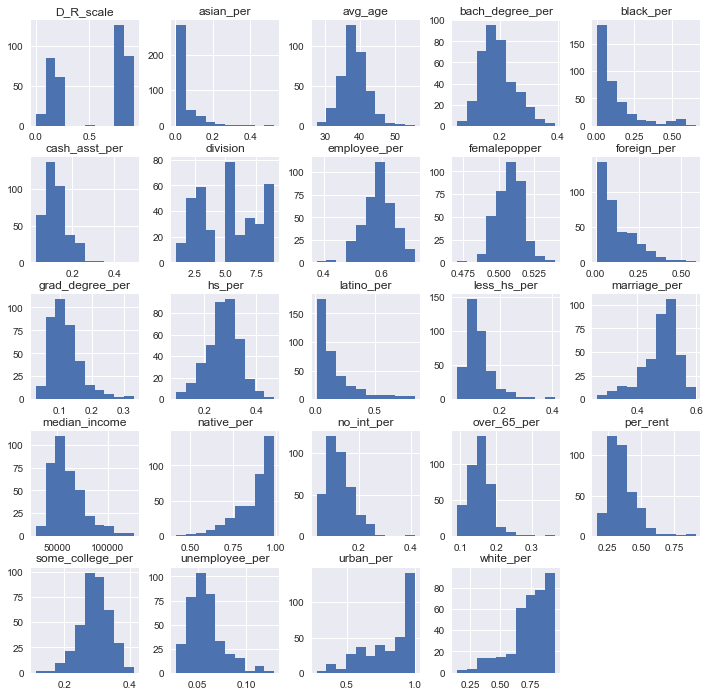

In [205]:
df_final_drop.hist(figsize=[12,12]);

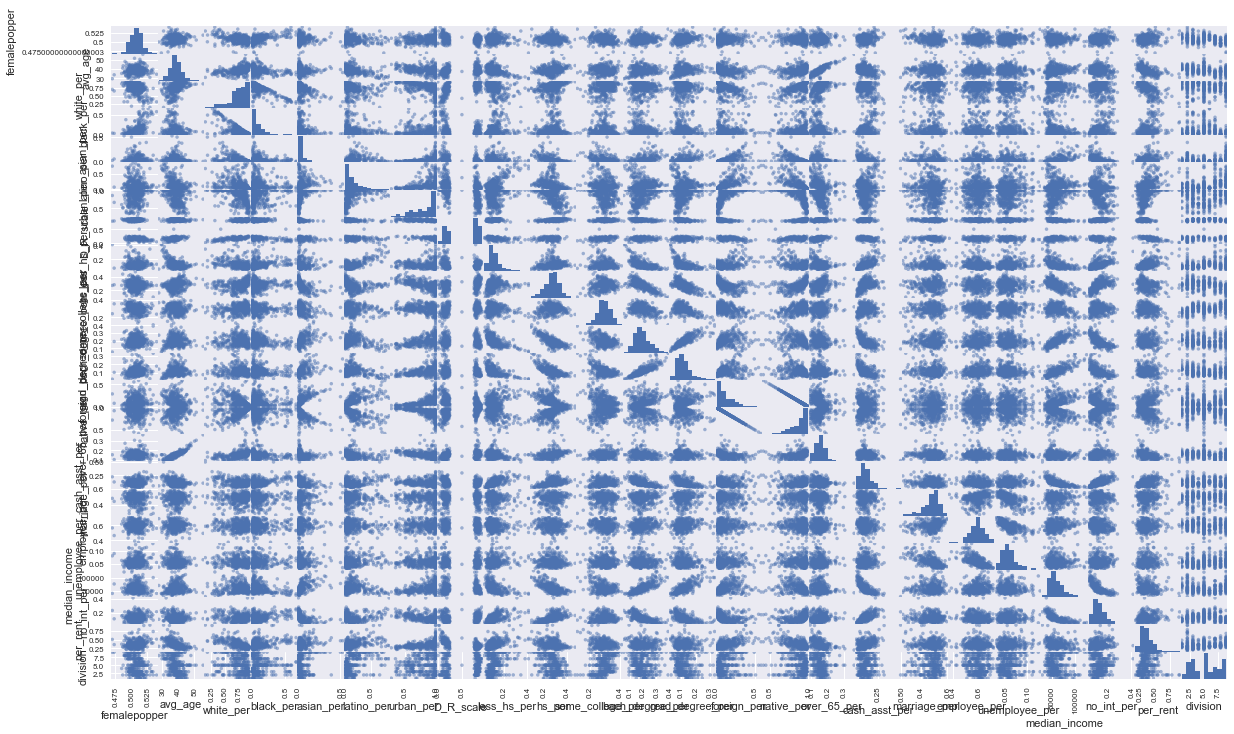

In [206]:
pd.plotting.scatter_matrix(df_final_drop, figsize=[20,12]);

In [207]:
# samp = sns.pairplot(df_final_drop, kind='reg')
# samp

In [228]:
np.log(df_final_drop['per_rent']).describe()

count    374.000000
mean      -1.046862
std        0.263259
min       -1.757938
25%       -1.223280
50%       -1.062051
75%       -0.901321
max       -0.091651
Name: per_rent, dtype: float64

In [230]:
df_final_drop = df_final_drop.astype(float)
#makes sure all columns are assigne to float type

# Model Testing

In [231]:
df_final_drop2 = df_final_drop.drop('D_R_scale', axis=1)
#drops target column

In [232]:
X= df_final_drop2
y= df_final_drop['D_R_scale']
model = smf.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              D_R_scale   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     16.26
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           3.29e-41
Time:                        17:05:58   Log-Likelihood:                 16.786
No. Observations:                 374   AIC:                             12.43
Df Residuals:                     351   BIC:                             102.7
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
femalepopper        -0.7519      2.035     -0.369      0.712      -4.754       3.251
avg_age             -0.0027      0.011     -0.248      0.804      -0.024       0.019
white_per            1.0258      0.303      3.383      0.001       0.429       1.622
black_per            0.4965      0.329      1.509      0.132      -0.150       1.143
asian_per            0.1589      0.516      0.308      0.758      -0.855       1.173
latino_per          -0.4249      0.232     -1.829      0.068      -0.882       0.032
urban_per           -0.3663      0.133     -2.746      0.006      -0.629      -0.104
less_hs_per         57.5495    200.389      0.287      0.774    -336.565     451.664
hs_per              57.5567    200.344      0.287      0.774    -336.470     451.583
some_college_per    56.6555    200.373      0.283      0.778    -337.427     450.738
bach_degree_per     58.6347    200.372      0.293      0.770    -335.446     452.716
grad_degree_per     55.1090    200.331      0.275      0.783    -338.891     449.109
foreign_per        -55.9339    200.428     -0.279      0.780    -450.124     338.257
native_per         -56.4363    200.398     -0.282      0.778    -450.568     337.695
over_65_per         -0.5515      1.115     -0.495      0.621      -2.744       1.641
cash_asst_per       -0.4297      0.471     -0.913      0.362      -1.356       0.496
marriage_per         0.1128      0.284      0.397      0.692      -0.446       0.672
employee_per        -0.0121      0.324     -0.037      0.970      -0.650       0.626
unemployee_per       0.3661      1.305      0.281      0.779      -2.200       2.932
median_income    -6.613e-07   2.32e-06     -0.284      0.776   -5.23e-06    3.91e-06
no_int_per           0.0427      0.518      0.082      0.934      -0.977       1.062
per_rent            -0.8564      0.266     -3.224      0.001      -1.379      -0.334
division             0.0267      0.008      3.257      0.001       0.011       0.043
==============================================================================
Omnibus:                        8.540   Durbin-Watson:                   1.696
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                8.733
Skew:                          -0.374   Prob(JB):                       0.0127
Kurtosis:                       2.986   Cond. No.                     2.69e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [234]:
X= df_final_drop[['white_per', 'urban_per', 'black_per', 'asian_per', 'cash_asst_per', 'grad_degree_per', 'avg_age', 'per_rent', 'native_per', 'latino_per', 'unemployee_per']]
y= df_final_drop['D_R_scale']
model = smf.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()
#trying to manually insert best columns

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              D_R_scale   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     193.7
Date:                Thu, 06 Dec 2018   Prob (F-statistic):          1.78e-144
Time:                        17:06:01   Log-Likelihood:                 3.7982
No. Observations:                 374   AIC:                             14.40
Df Residuals:                     363   BIC:                             57.57
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
white_per           1.4309      0.231      6.196      0.000       0.977       1.885
urban_per          -0.3651      0.104     -3.506      0.001      -0.570      -0.160
black_per           0.9379      0.236      3.966      0.000       0.473       1.403
asian_per           1.3585      0.358      3.796      0.000       0.655       2.062
cash_asst_per      -1.1362      0.380     -2.993      0.003      -1.883      -0.390
grad_degree_per    -1.5029      0.386     -3.894      0.000      -2.262      -0.744
avg_age            -0.0040      0.004     -1.019      0.309      -0.012       0.004
per_rent           -0.4196      0.188     -2.228      0.026      -0.790      -0.049
native_per          0.1953      0.178      1.095      0.274      -0.155       0.546
latino_per          0.1117      0.125      0.896      0.371      -0.133       0.357
unemployee_per      0.3545      0.745      0.476      0.634      -1.111       1.820
==============================================================================
Omnibus:                        7.655   Durbin-Watson:                   1.640
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                7.588
Skew:                          -0.345   Prob(JB):                       0.0225
Kurtosis:                       3.109   Cond. No.                     2.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## creating dummy variables for district columns

In [236]:
dfgd = pd.get_dummies(df_final_drop['division'], drop_first=False)

In [237]:
dft= pd.concat([df_final_drop, dfgd], axis=1)

In [238]:
df_final_drop3= dft.drop('division', axis=1)

In [257]:
df_final_drop3 = df_final_drop3.rename(columns={1.0:'New_England', 2.0:'Mid_Atlantic', 3.0:'East_North_Central', 4.0:'West_North_Central', 5.0:'South_Atlantic', 6.0:'East_South_Central', 7.0:'West_South_Central', 8.0:'Mountain', 9.0:'Pacific'})

In [259]:
X= df_final_drop3.drop('D_R_scale', axis=1)
y= df_final_drop3['D_R_scale']
model = smf.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()
#running model with dummy variables in place

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              D_R_scale   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     15.70
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           6.27e-47
Time:                        17:19:26   Log-Likelihood:                 43.072
No. Observations:                 374   AIC:                            -26.14
Df Residuals:                     344   BIC:                             91.58
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
femalepopper          -1.4481      1.985     -0.730      0.466      -5.352       2.456
avg_age               -0.0007      0.011     -0.061      0.952      -0.022       0.021
white_per              0.7792      0.299      2.607      0.010       0.191       1.367
black_per             -0.0901      0.337     -0.267      0.789      -0.752       0.572
asian_per              0.1040      0.504      0.206      0.837      -0.887       1.095
latino_per            -0.5490      0.228     -2.412      0.016      -0.997      -0.101
urban_per             -0.3307      0.132     -2.509      0.013      -0.590      -0.071
less_hs_per           73.5372    189.837      0.387      0.699    -299.849     446.924
hs_per                72.9142    189.793      0.384      0.701    -300.386     446.214
some_college_per      73.1747    189.823      0.385      0.700    -300.185     446.535
bach_degree_per       73.9792    189.817      0.390      0.697    -299.369     447.327
grad_degree_per       70.9163    189.791      0.374      0.709    -302.380     444.213
foreign_per          -58.8383    155.341     -0.379      0.705    -364.376     246.699
native_per           -59.1276    155.319     -0.381      0.704    -364.621     246.366
over_65_per           -0.4020      1.089     -0.369      0.712      -2.543       1.739
cash_asst_per          0.1403      0.462      0.304      0.761      -0.768       1.048
marriage_per           0.3220      0.271      1.188      0.236      -0.211       0.855
employee_per           0.3015      0.317      0.951      0.342      -0.322       0.925
unemployee_per         1.3148      1.256      1.047      0.296      -1.155       3.785
median_income       1.683e-06   2.37e-06      0.709      0.479   -2.98e-06    6.35e-06
no_int_per            -0.3529      0.504     -0.700      0.484      -1.344       0.638
per_rent              -0.5537      0.263     -2.103      0.036      -1.072      -0.036
New_England          -13.4635     34.516     -0.390      0.697     -81.352      54.425
Mid_Atlantic         -13.0818     34.517     -0.379      0.705     -80.973      54.809
East_North_Central   -13.1330     34.517     -0.380      0.704     -81.025      54.759
West_North_Central   -13.1808     34.519     -0.382      0.703     -81.075      54.713
South_Atlantic       -12.9842     34.518     -0.376      0.707     -80.877      54.909
East_South_Central   -12.9819     34.521     -0.376      0.707     -80.881      54.917
West_South_Central   -12.9136     34.515     -0.374      0.709     -80.800      54.973
Mountain             -13.0816     34.520     -0.379      0.705     -80.978      54.815
Pacific              -13.1455     34.517     -0.381      0.704     -81.037      54.746
==============================================================================
Omnibus:                       11.304   Durbin

# Train v Test models

In [377]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn import pipeline
import statsmodels.api as sm
scaler = preprocessing.StandardScaler()

In [425]:
full_df = df_final_drop3[['D_R_scale','femalepopper','avg_age','white_per','black_per','asian_per','latino_per','urban_per','less_hs_per','hs_per','some_college_per','bach_degree_per','grad_degree_per','foreign_per','native_per','over_65_per','cash_asst_per','marriage_per','employee_per','unemployee_per','median_income','no_int_per','per_rent','New_England','Mid_Atlantic', 'East_North_Central','West_North_Central', 'South_Atlantic', 'East_South_Central','West_South_Central', 'Mountain', 'Pacific']]

In [426]:
target = full_df.D_R_scale
features = full_df.iloc[:,1:]

In [428]:
features.head()

,femalepopper,avg_age,white_per,black_per,asian_per,latino_per,urban_per,less_hs_per,hs_per,some_college_per,bach_degree_per,grad_degree_per,foreign_per,native_per,over_65_per,cash_asst_per,marriage_per,employee_per,unemployee_per,median_income,no_int_per,per_rent,New_England,Mid_Atlantic,East_North_Central,West_North_Central,South_Atlantic,East_South_Central,West_South_Central,Mountain,Pacific
1,0.5122,38.2,0.647,0.309,0.011,0.035,0.5471,0.1608,0.3192,0.3021,0.1386,0.0794,0.0257,0.9743,0.1613,0.1606,0.494,0.530,0.066,42035.0,0.186,0.348244,0,0,0,0,0,1,0,0,0
2,0.5139,38.3,0.701,0.254,0.016,0.029,0.5024,0.1636,0.3052,0.3035,0.1356,0.0920,0.0278,0.9722,0.1547,0.1418,0.516,0.504,0.061,46544.0,0.176,0.304818,0,0,0,0,0,1,0,0,0
4,0.5074,40.1,0.767,0.172,0.016,0.049,0.6553,0.1358,0.2799,0.2816,0.1847,0.1180,0.0435,0.9565,0.1578,0.1287,0.528,0.592,0.044,51690.0,0.141,0.293890,0,0,0,0,0,1,0,0,0
5,0.5170,39.0,0.796,0.147,0.017,0.049,0.6917,0.0991,0.2480,0.2855,0.2273,0.1401,0.0476,0.9524,0.1544,0.0734,0.336,0.495,0.109,61413.0,0.112,0.251832,0,0,0,0,0,1,0,0,0
7,0.4735,33.5,0.656,0.033,0.060,0.067,0.6602,0.0689,0.2796,0.3559,0.1897,0.1059,0.0773,0.9227,0.1022,0.1334,0.440,0.463,0.090,76440.0,0.110,0.355189,0,0,0,0,0,0,0,0,1


In [437]:
x_train, x_test, y_train, y_test = train_test_split(features, target, random_state=32,test_size=0.2)

In [438]:
X= x_train
y= y_train
X_sm = sm.add_constant(X)
model = smf.OLS(y, X_sm).fit()
# predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              D_R_scale   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     13.24
Date:                Fri, 07 Dec 2018   Prob (F-statistic):           6.43e-37
Time:                        11:58:10   Log-Likelihood:                 39.431
No. Observations:                 299   AIC:                            -18.86
Df Residuals:                     269   BIC:                             92.15
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -41.0525    127.976     -0.321      0.749    -293.014     210.909
femalepopper          -0.4114      2.288     -0.180      0.857      -4.916       4.093
avg_age                0.0031      0.013      0.246      0.806      -0.022       0.028
white_per              0.6848      0.350      1.954      0.052      -0.005       1.375
black_per             -0.1615      0.385     -0.419      0.675      -0.920       0.597
asian_per              0.3762      0.591      0.637      0.525      -0.787       1.539
latino_per            -0.3272      0.285     -1.147      0.252      -0.889       0.234
urban_per             -0.3584      0.146     -2.459      0.015      -0.645      -0.071
less_hs_per           66.9427    206.252      0.325      0.746    -339.132     473.017
hs_per                66.6050    206.155      0.323      0.747    -339.278     472.488
some_college_per      66.6742    206.209      0.323      0.747    -339.315     472.664
bach_degree_per       67.6846    206.206      0.328      0.743    -338.299     473.668
grad_degree_per       64.9878    206.168      0.315      0.753    -340.919     470.895
foreign_per          -20.5132     63.993     -0.321      0.749    -146.503     105.477
native_per           -20.5393     63.984     -0.321      0.748    -146.512     105.434
over_65_per           -0.8152      1.235     -0.660      0.510      -3.246       1.616
cash_asst_per          0.3908      0.532      0.734      0.463      -0.657       1.439
marriage_per           0.2433      0.303      0.803      0.423      -0.353       0.840
employee_per           0.3027      0.354      0.855      0.393      -0.394       1.000
unemployee_per         1.1836      1.362      0.869      0.386      -1.498       3.865
median_income      -4.316e-07   2.79e-06     -0.155      0.877   -5.93e-06    5.07e-06
no_int_per            -0.7111      0.562     -1.265      0.207      -1.818       0.396
per_rent              -0.7371      0.307     -2.401      0.017      -1.342      -0.133
New_England           -4.9562     14.218     -0.349      0.728     -32.948      23.036
Mid_Atlantic          -4.5325     14.218     -0.319      0.750     -32.525      23.460
East_North_Central    -4.5708     14.218     -0.321      0.748     -32.564      23.422
West_North_Central    -4.6166     14.220     -0.325      0.746     -32.613      23.379
South_Atlantic        -4.4385     14.219     -0.312      0.755     -32.434      23.557
East_South_Central    -4.4371     14.225     -0.312      0.755     -32.444      23.569
West_South_Central    -4.3844     14.217     -0.308      0.758     -32.375      23.606
Mountain              -4.5115     14.224     -0.317      0.751     -32.515      23.492
Pacific               -4.6049     14.218     -0.324      0.746     -32.598      23.388
======================================

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


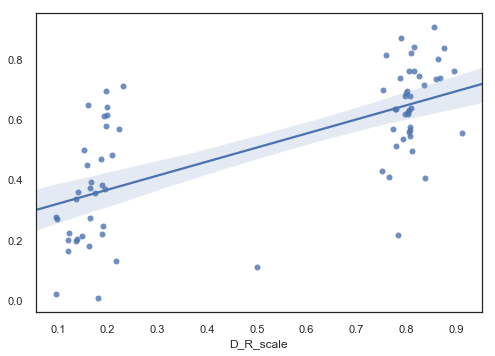

In [440]:
# plot residual model
#actual v. pred
lm = linear_model.LinearRegression()
lm.fit(x_train, y_train)
y_pred = lm.predict(x_test)
sns.regplot(y_test, y_pred)

In [444]:
# Transform features selection to be polynomial. 
# This means that there will be more features to select from. We do this because some features
# don't have a linear relationship with the target variable. We arbitrarily choose degree = 2 polynomial

poly = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
features_train = pd.DataFrame(poly.fit_transform(x_train), columns=poly.get_feature_names(x_train.columns))
pd.set_option('display.max_columns', 300)

features_test = pd.DataFrame(poly.fit_transform(x_test), columns=poly.get_feature_names(x_test.columns))
features_train.head()
#multiplied and squared our features against one another

,femalepopper,avg_age,white_per,black_per,asian_per,latino_per,urban_per,less_hs_per,hs_per,some_college_per,bach_degree_per,grad_degree_per,foreign_per,native_per,over_65_per,cash_asst_per,marriage_per,employee_per,unemployee_per,median_income,no_int_per,per_rent,New_England,Mid_Atlantic,East_North_Central,West_North_Central,South_Atlantic,East_South_Central,West_South_Central,Mountain,Pacific,femalepopper^2,femalepopper avg_age,femalepopper white_per,femalepopper black_per,femalepopper asian_per,femalepopper latino_per,femalepopper urban_per,femalepopper less_hs_per,femalepopper hs_per,femalepopper some_college_per,femalepopper bach_degree_per,femalepopper grad_degree_per,femalepopper foreign_per,femalepopper native_per,femalepopper over_65_per,femalepopper cash_asst_per,femalepopper marriage_per,femalepopper employee_per,femalepopper unemployee_per,femalepopper median_income,femalepopper no_int_per,femalepopper per_rent,femalepopper New_England,femalepopper Mid_Atlantic,femalepopper East_North_Central,femalepopper West_North_Central,femalepopper South_Atlantic,femalepopper East_South_Central,femalepopper West_South_Central,femalepopper Mountain,femalepopper Pacific,avg_age^2,avg_age white_per,avg_age black_per,avg_age asian_per,avg_age latino_per,avg_age urban_per,avg_age less_hs_per,avg_age hs_per,avg_age some_college_per,avg_age bach_degree_per,avg_age grad_degree_per,avg_age foreign_per,avg_age native_per,avg_age over_65_per,avg_age cash_asst_per,avg_age marriage_per,avg_age employee_per,avg_age unemployee_per,avg_age median_income,avg_age no_int_per,avg_age per_rent,avg_age New_England,avg_age Mid_Atlantic,avg_age East_North_Central,avg_age West_North_Central,avg_age South_Atlantic,avg_age East_South_Central,avg_age West_South_Central,avg_age Mountain,avg_age Pacific,white_per^2,white_per black_per,white_per asian_per,white_per latino_per,white_per urban_per,white_per less_hs_per,white_per hs_per,white_per some_college_per,white_per bach_degree_per,white_per grad_degree_per,white_per foreign_per,white_per native_per,white_per over_65_per,white_per cash_asst_per,white_per marriage_per,white_per employee_per,white_per unemployee_per,white_per median_income,white_per no_int_per,white_per per_rent,white_per New_England,white_per Mid_Atlantic,white_per East_North_Central,white_per West_North_Central,white_per South_Atlantic,white_per East_South_Central,white_per West_South_Central,white_per Mountain,white_per Pacific,black_per^2,black_per asian_per,black_per latino_per,black_per urban_per,black_per less_hs_per,black_per hs_per,black_per some_college_per,black_per bach_degree_per,black_per grad_degree_per,black_per foreign_per,black_per native_per,black_per over_65_per,black_per cash_asst_per,black_per marriage_per,black_per employee_per,black_per unemployee_per,black_per median_income,black_per no_int_per,black_per per_rent,black_per New_England,black_per Mid_Atlantic,black_per East_North_Central,black_per West_North_Central,black_per South_Atlantic,black_per East_South_Central,black_per West_South_Central,black_per Mountain,black_per Pacific,asian_per^2,...,over_65_per employee_per,over_65_per unemployee_per,over_65_per median_income,over_65_per no_int_per,over_65_per per_rent,over_65_per New_England,over_65_per Mid_Atlantic,over_65_per East_North_Central,over_65_per West_North_Central,over_65_per South_Atlantic,over_65_per East_South_Central,over_65_per West_South_Central,over_65_per Mountain,over_65_per Pacific,cash_asst_per^2,cash_asst_per marriage_per,cash_asst_per employee_per,cash_asst_per unemployee_per,cash_asst_per median_income,cash_asst_per no_int_per,cash_asst_per per_rent,cash_asst_per New_England,cash_asst_per Mid_Atlantic,cash_asst_per East_North_Central,cash_asst_per West_North_Central,cash_asst_per South_Atlantic,cash_asst_per East_South_Central,cash_asst_per West_South_Central,cash_asst_per Mountain,cash_asst_per Pacific,marriage_per^2,marriage_per employee_per,marriage_per unemployee_per,marriage_per medi

# Wrapper Method

In [279]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import VarianceThreshold

In [445]:
thresholder = VarianceThreshold(threshold=.5)
def variance_threshold_selector(data, threshold=0.5):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [446]:
def information_selector(X, y, scoring, k=5):
    selector = SelectKBest(score_func=scoring, k=k)
    selector.fit(X, y)
    return X[X.columns[selector.get_support(indices=True)]]

In [447]:
features_selected_train = variance_threshold_selector(features_train)

In [448]:
features_selected_train = information_selector(features_selected_train, y_train, mutual_info_regression, k=30)

In [449]:
rfe = RFE(lm, n_features_to_select=10)
rfe.fit(features_selected_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=10, step=1, verbose=0)

In [450]:
def ranking(ranks, names, order=1):

    ranks = map(lambda x: round(x,2), ranks)
    return list(sorted(zip(ranks, names),reverse=True))

In [451]:
rankings = ranking(np.abs(lm.coef_), features_selected_train.columns)

In [452]:
rankings[:30];

In [453]:
[item[1] for item in rankings[0:40]];

In [504]:
final_columns = [item[1] for item in rankings[0:15]]

In [505]:
final_values = [item[0] for item in rankings[0:40]]

In [506]:
lm = linear_model.LinearRegression()
model = lm.fit(features_selected_train[final_columns], y_train)


In [507]:
features_selected_test.head()

,avg_age native_per,avg_age some_college_per,avg_age foreign_per,avg_age grad_degree_per,avg_age over_65_per,latino_per median_income,avg_age Mid_Atlantic,some_college_per median_income,less_hs_per median_income,avg_age asian_per,femalepopper median_income,white_per median_income
0,-0.597065,0.014909,0.597065,0.481914,0.429623,0.602784,0.331685,0.018575,-0.720360,0.434325,0.212515,0.935257
1,3.371503,0.038236,-3.371503,2.618773,2.070327,-2.989125,0.692604,0.019136,-3.154905,-0.820775,1.382527,0.495725
2,-0.224665,-0.689860,0.224665,0.029029,-0.051903,0.310085,0.139947,-1.094986,0.522868,0.141570,0.394341,-0.445291
3,-0.123794,0.157135,0.123794,-0.528998,0.123446,-0.271140,0.106111,-0.544500,-1.408289,0.079687,-1.674688,0.849943
4,0.784093,-0.051155,-0.784093,0.038429,1.018574,-0.174431,-0.480383,-0.009111,-0.213433,-0.539611,0.063887,0.237781


In [508]:
features_scaled_test.head()

,femalepopper,avg_age,white_per,black_per,asian_per,latino_per,urban_per,less_hs_per,hs_per,some_college_per,bach_degree_per,grad_degree_per,foreign_per,native_per,over_65_per,cash_asst_per,marriage_per,employee_per,unemployee_per,median_income,no_int_per,per_rent,New_England,Mid_Atlantic,East_North_Central,West_North_Central,South_Atlantic,East_South_Central,West_South_Central,Mountain,Pacific
125,-0.213619,-0.798490,-0.940118,1.718791,-0.543933,-0.605918,-1.082986,0.724104,1.078725,-0.018672,-1.320779,-0.603531,-0.747743,0.747743,-0.538044,0.921969,-0.803745,0.744301,0.540757,-0.994829,1.147109,0.060073,0,0,0,0,1,0,0,0,0
71,-1.656756,-1.667358,-0.594054,-0.401681,0.492261,3.582028,0.719605,3.780691,-0.423621,-0.022932,-1.656244,-1.570613,2.022063,-2.022063,-1.241682,1.308053,0.331143,0.243645,-0.586912,-0.834478,0.053185,1.866975,0,0,0,0,0,0,0,0,1
417,-0.737424,-0.336904,0.832703,-0.783816,-0.420209,-0.579865,-0.156699,-0.977773,-0.543235,2.047644,-0.104276,-0.086163,-0.666852,0.666852,0.154059,0.616320,0.267206,-1.295410,0.258839,-0.534754,-0.615324,0.016932,0,0,0,0,0,0,0,0,1
75,-1.891934,-0.255448,0.960200,-0.836265,-0.311950,-0.306313,0.037917,-1.590977,-1.839846,-0.615134,2.198075,2.070866,-0.484616,0.484616,-0.483252,-1.240812,0.395081,-0.127212,0.258839,0.885173,-1.243317,-0.340473,0,0,0,0,0,0,0,1,0
313,0.310186,1.156462,1.154482,-0.738859,-0.466605,-0.846904,0.211795,-1.036263,0.609840,-0.044234,0.301814,0.033230,-0.678010,0.678010,0.880767,-1.056708,0.283190,0.558873,0.033306,0.205964,-0.716613,-1.007313,0,0,1,0,0,0,0,0,0


In [509]:
features_selected_test = features_64_test[final_columns]
y_pred = lm.predict(features_selected_test)

print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.3579370872559396
0.20067154246550165
0.44796377360842654


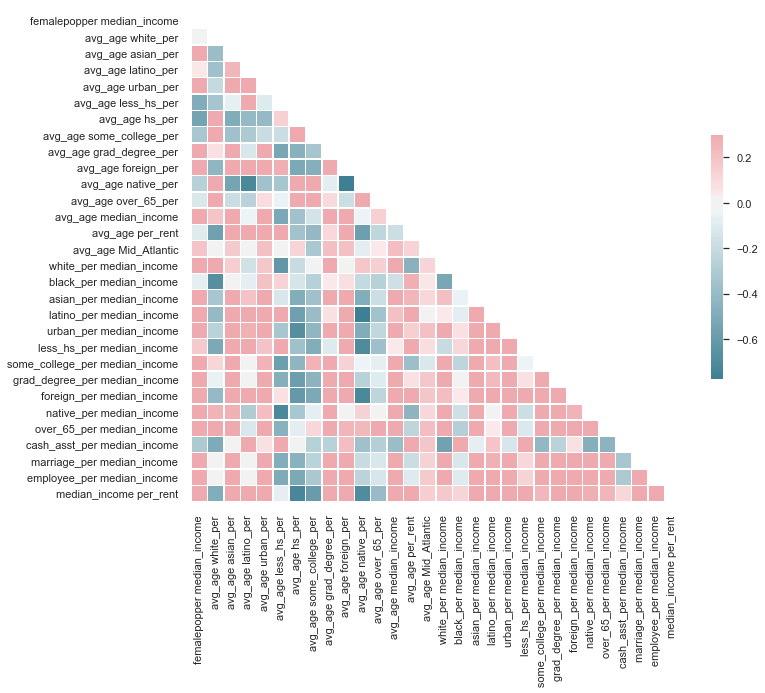

In [510]:
sns.set(style="white")


# Compute the correlation matrix
corr = features_selected_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [513]:
final_columns

['avg_age native_per',
 'avg_age some_college_per',
 'avg_age foreign_per',
 'avg_age grad_degree_per',
 'avg_age over_65_per',
 'latino_per median_income',
 'avg_age Mid_Atlantic',
 'some_college_per median_income',
 'less_hs_per median_income',
 'avg_age asian_per',
 'femalepopper median_income',
 'white_per median_income',
 'grad_degree_per median_income',
 'avg_age urban_per',
 'avg_age hs_per']

In [520]:
final_columns = ['avg_age native_per',
 'avg_age some_college_per',
 'avg_age foreign_per',
 'avg_age grad_degree_per',
 'some_college_per median_income',
 'less_hs_per median_income',
 'femalepopper median_income',
 'white_per median_income',
 'grad_degree_per median_income',
 'avg_age urban_per',
 'avg_age hs_per']

In [521]:
X= features_selected_train[final_columns]
y= list(y_train)
model = smf.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     148.4
Date:                Fri, 07 Dec 2018   Prob (F-statistic):          1.10e-111
Time:                        12:55:46   Log-Likelihood:                -3.8682
No. Observations:                 299   AIC:                             29.74
Df Residuals:                     288   BIC:                             70.44
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
avg_age native_per                 0.0634      0.017      3.667      0.000       0.029       0.098
avg_age some_college_per          -0.0752      0.037     -2.030      0.043      -0.148      -0.002
avg_age foreign_per                0.0521      0.017      3.099      0.002       0.019       0.085
avg_age grad_degree_per           -0.1317      0.041     -3.244      0.001      -0.212      -0.052
some_college_per median_income  2.821e-05   2.14e-05      1.317      0.189   -1.39e-05    7.04e-05
less_hs_per median_income      -2.644e-05   1.03e-05     -2.576      0.011   -4.67e-05   -6.24e-06
femalepopper median_income     -1.938e-05   1.62e-05     -1.194      0.233   -5.13e-05    1.26e-05
white_per median_income         8.707e-06   1.94e-06      4.485      0.000    4.89e-06    1.25e-05
grad_degree_per median_income   1.937e-05   1.75e-05      1.108      0.269    -1.5e-05    5.38e-05
avg_age urban_per                 -0.0115      0.003     -3.703      0.000      -0.018      -0.005
avg_age hs_per                    -0.0281      0.016     -1.784      0.075      -0.059       0.003
==============================================================================
Omnibus:                       10.774   Durbin-Watson:                   2.119
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.384
Skew:                          -0.394   Prob(JB):                      0.00337
Kurtosis:                       3.542   Cond. No.                     2.24e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [524]:
full_df.head()

,D_R_scale,femalepopper,avg_age,white_per,black_per,asian_per,latino_per,urban_per,less_hs_per,hs_per,some_college_per,bach_degree_per,grad_degree_per,foreign_per,native_per,over_65_per,cash_asst_per,marriage_per,employee_per,unemployee_per,median_income,no_int_per,per_rent,New_England,Mid_Atlantic,East_North_Central,West_North_Central,South_Atlantic,East_South_Central,West_South_Central,Mountain,Pacific
1,0.77310,0.5122,38.2,0.647,0.309,0.011,0.035,0.5471,0.1608,0.3192,0.3021,0.1386,0.0794,0.0257,0.9743,0.1613,0.1606,0.494,0.530,0.066,42035.0,0.186,0.348244,0,0,0,0,0,1,0,0,0
2,0.83510,0.5139,38.3,0.701,0.254,0.016,0.029,0.5024,0.1636,0.3052,0.3035,0.1356,0.0920,0.0278,0.9722,0.1547,0.1418,0.516,0.504,0.061,46544.0,0.176,0.304818,0,0,0,0,0,1,0,0,0
4,0.83395,0.5074,40.1,0.767,0.172,0.016,0.049,0.6553,0.1358,0.2799,0.2816,0.1847,0.1180,0.0435,0.9565,0.1578,0.1287,0.528,0.592,0.044,51690.0,0.141,0.293890,0,0,0,0,0,1,0,0,0
5,0.87280,0.5170,39.0,0.796,0.147,0.017,0.049,0.6917,0.0991,0.2480,0.2855,0.2273,0.1401,0.0476,0.9524,0.1544,0.0734,0.336,0.495,0.109,61413.0,0.112,0.251832,0,0,0,0,0,1,0,0,0
7,0.79140,0.4735,33.5,0.656,0.033,0.060,0.067,0.6602,0.0689,0.2796,0.3559,0.1897,0.1059,0.0773,0.9227,0.1022,0.1334,0.440,0.463,0.090,76440.0,0.110,0.355189,0,0,0,0,0,0,0,0,1


In [526]:
# pairplot = sns.pairplot(features_scaled_test, kind='reg')
# pairplot

## Scaling data

In [529]:
features_scaled_train = pd.DataFrame(scaler.transform(X_train.iloc[:,:-9]), columns=X_train.columns[:-9], index=X_train.index)

In [530]:
features_scaled_train['New_England'] = X_train.New_England
features_scaled_train['Mid_Atlantic'] = X_train.Mid_Atlantic
features_scaled_train['East_North_Central'] = X_train.East_North_Central
features_scaled_train['West_North_Central'] = X_train.West_North_Central
features_scaled_train['South_Atlantic'] = X_train.South_Atlantic
features_scaled_train['East_South_Central'] = X_train.East_South_Central
features_scaled_train['West_South_Central'] = X_train.West_South_Central
features_scaled_train['Mountain'] = X_train.Mountain
features_scaled_train['Pacific'] = X_train.Pacific

In [531]:
features_scaled_test = pd.DataFrame(scaler.transform(X_test.iloc[:,:-9]), columns=X_test.columns[:-9], index=X_test.index)

In [532]:
features_scaled_test['New_England'] = X_test.New_England
features_scaled_test['Mid_Atlantic'] = X_test.Mid_Atlantic
features_scaled_test['East_North_Central'] = X_test.East_North_Central
features_scaled_test['West_North_Central'] = X_test.West_North_Central
features_scaled_test['South_Atlantic'] = X_test.South_Atlantic
features_scaled_test['East_South_Central'] = X_test.East_South_Central
features_scaled_test['West_South_Central'] = X_test.West_South_Central
features_scaled_test['Mountain'] = X_test.Mountain
features_scaled_test['Pacific'] = X_test.Pacific

In [533]:
poly = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
features_64_train = pd.DataFrame(poly.fit_transform(features_scaled_train), columns=poly.get_feature_names(features_scaled_train.columns))
features_64_train.head()
len(features_64_train.columns)
#multiplied and squared our features against one another

527

In [534]:
features_64_test = pd.DataFrame(poly.fit_transform(features_scaled_test), columns=poly.get_feature_names(features_scaled_test.columns))
features_64_test.head()

,femalepopper,avg_age,white_per,black_per,asian_per,latino_per,urban_per,less_hs_per,hs_per,some_college_per,bach_degree_per,grad_degree_per,foreign_per,native_per,over_65_per,cash_asst_per,marriage_per,employee_per,unemployee_per,median_income,no_int_per,per_rent,New_England,Mid_Atlantic,East_North_Central,West_North_Central,South_Atlantic,East_South_Central,West_South_Central,Mountain,Pacific,femalepopper^2,femalepopper avg_age,femalepopper white_per,femalepopper black_per,femalepopper asian_per,femalepopper latino_per,femalepopper urban_per,femalepopper less_hs_per,femalepopper hs_per,femalepopper some_college_per,femalepopper bach_degree_per,femalepopper grad_degree_per,femalepopper foreign_per,femalepopper native_per,femalepopper over_65_per,femalepopper cash_asst_per,femalepopper marriage_per,femalepopper employee_per,femalepopper unemployee_per,femalepopper median_income,femalepopper no_int_per,femalepopper per_rent,femalepopper New_England,femalepopper Mid_Atlantic,femalepopper East_North_Central,femalepopper West_North_Central,femalepopper South_Atlantic,femalepopper East_South_Central,femalepopper West_South_Central,femalepopper Mountain,femalepopper Pacific,avg_age^2,avg_age white_per,avg_age black_per,avg_age asian_per,avg_age latino_per,avg_age urban_per,avg_age less_hs_per,avg_age hs_per,avg_age some_college_per,avg_age bach_degree_per,avg_age grad_degree_per,avg_age foreign_per,avg_age native_per,avg_age over_65_per,avg_age cash_asst_per,avg_age marriage_per,avg_age employee_per,avg_age unemployee_per,avg_age median_income,avg_age no_int_per,avg_age per_rent,avg_age New_England,avg_age Mid_Atlantic,avg_age East_North_Central,avg_age West_North_Central,avg_age South_Atlantic,avg_age East_South_Central,avg_age West_South_Central,avg_age Mountain,avg_age Pacific,white_per^2,white_per black_per,white_per asian_per,white_per latino_per,white_per urban_per,white_per less_hs_per,white_per hs_per,white_per some_college_per,white_per bach_degree_per,white_per grad_degree_per,white_per foreign_per,white_per native_per,white_per over_65_per,white_per cash_asst_per,white_per marriage_per,white_per employee_per,white_per unemployee_per,white_per median_income,white_per no_int_per,white_per per_rent,white_per New_England,white_per Mid_Atlantic,white_per East_North_Central,white_per West_North_Central,white_per South_Atlantic,white_per East_South_Central,white_per West_South_Central,white_per Mountain,white_per Pacific,black_per^2,black_per asian_per,black_per latino_per,black_per urban_per,black_per less_hs_per,black_per hs_per,black_per some_college_per,black_per bach_degree_per,black_per grad_degree_per,black_per foreign_per,black_per native_per,black_per over_65_per,black_per cash_asst_per,black_per marriage_per,black_per employee_per,black_per unemployee_per,black_per median_income,black_per no_int_per,black_per per_rent,black_per New_England,black_per Mid_Atlantic,black_per East_North_Central,black_per West_North_Central,black_per South_Atlantic,black_per East_South_Central,black_per West_South_Central,black_per Mountain,black_per Pacific,asian_per^2,...,over_65_per employee_per,over_65_per unemployee_per,over_65_per median_income,over_65_per no_int_per,over_65_per per_rent,over_65_per New_England,over_65_per Mid_Atlantic,over_65_per East_North_Central,over_65_per West_North_Central,over_65_per South_Atlantic,over_65_per East_South_Central,over_65_per West_South_Central,over_65_per Mountain,over_65_per Pacific,cash_asst_per^2,cash_asst_per marriage_per,cash_asst_per employee_per,cash_asst_per unemployee_per,cash_asst_per median_income,cash_asst_per no_int_per,cash_asst_per per_rent,cash_asst_per New_England,cash_asst_per Mid_Atlantic,cash_asst_per East_North_Central,cash_asst_per West_North_Central,cash_asst_per South_Atlantic,cash_asst_per East_South_Central,cash_asst_per West_South_Central,cash_asst_per Mountain,cash_asst_per Pacific,marriage_per^2,marriage_per employee_per,marriage_per unemployee_per,marriage_per medi

In [535]:
features_selected_train1 = variance_threshold_selector(features_64_train, threshold=0.7)

In [536]:
len(features_64_train.columns), len(features_selected_train1.columns)

(527, 259)

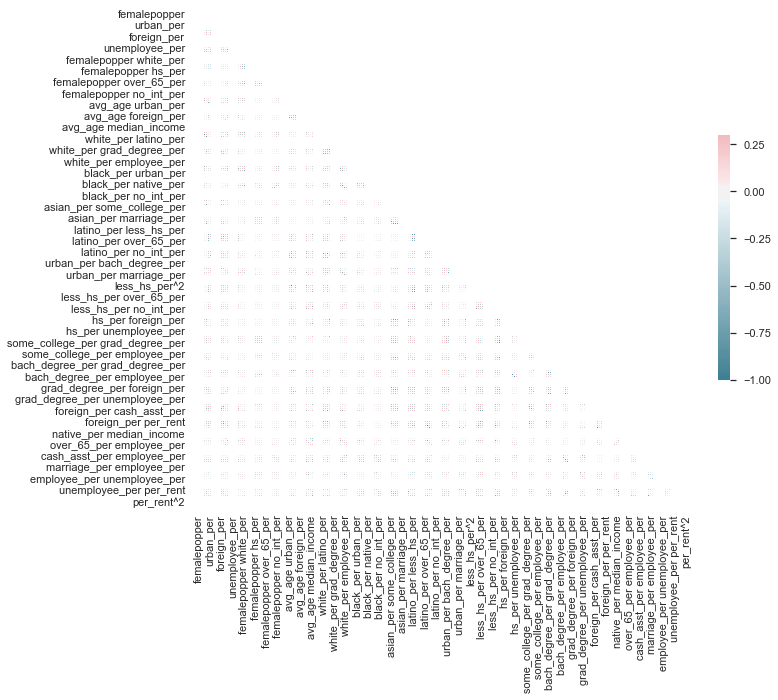

In [537]:
sns.set(style="white")

# Compute the correlation matrix
corr = features_selected_train1.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [538]:
# Create correlation matrix
corr_matrix = features_selected_train1.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

#changed the 0.9 to take out more vairables 

In [539]:
features_selected_train1.drop(columns=to_drop, inplace=True)

len(to_drop), len(features_selected_train.columns)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(45, 30)

In [540]:
test = SelectKBest(score_func=mutual_info_regression, k=30)
fit = test.fit(features_selected_train1, y_train)

In [541]:
features_selected_train1[features_selected_train1.columns[fit.get_support(indices=True)]].head()
len(features_selected_train.columns)

30

In [542]:
lm = linear_model.LinearRegression()
model1 = lm.fit(features_selected_train1, y_train)

In [543]:
x = [(x[0], x[1]) for x in zip(features_selected_train1, model1.coef_)]

In [546]:
features_selected_test = features_64_test[features_selected_train1.columns]
y_pred = lm.predict(features_selected_test)

print(f'R^2: {lm.score(features_selected_train1, y_train)}')
print(f'MAE: {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {metrics.mean_squared_error(y_test, y_pred)}')
print(f'MSRE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'z: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))/ y_test.std()}')

R^2: 0.8990748904044077
MAE: 0.41811818033468623
MSE: 0.38842681978470933
MSRE: 0.6232389748601329
z: 1.9267724808484799


Text(0,0.5,'Predictions')

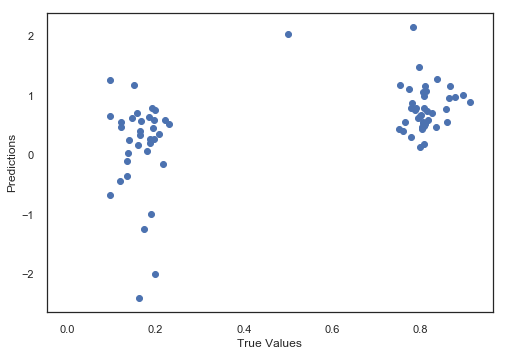

In [547]:
g = range(0,1)
plt.scatter(y_test, y_pred)
plt.plot(g,g,c='g')
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [549]:
X = features_selected_train1
y_sm = list(y_train)
#y_sm = list(np.log(y_train/(1-y_train)))
#y_sm = list(np.log(y_train))
X_sm = sm.add_constant(X)
sm_model = sm.OLS(y_sm, X_sm).fit()
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     3.497
Date:                Fri, 07 Dec 2018   Prob (F-statistic):           4.07e-10
Time:                        13:45:36   Log-Likelihood:                 249.74
No. Observations:                 299   AIC:                            -69.49
Df Residuals:                      84   BIC:                             726.1
Df Model:                         214                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.5292      0.088      5.991      0.000       0.354       0.705
femalepopper                        -0.0443      0.048     -0.919      0.361      -0.140       0.052
avg_age                             -0.2772      0.124     -2.229      0.029      -0.525      -0.030
white_per                            0.3048      0.230      1.325      0.189      -0.153       0.762
black_per                            0.3400      0.201      1.691      0.095      -0.060       0.740
asian_per                           -0.1121      0.226     -0.496      0.621      -0.562       0.337
latino_per                          -0.0383      0.191     -0.201      0.841      -0.418       0.341
urban_per                           -0.0893      0.098     -0.910      0.365      -0.284       0.106
less_hs_per                         16.2184     19.282      0.841      0.403     -22.127      54.563
hs_per                              19.3329     22.772      0.849      0.398     -25.952      64.618
some_college_per                    14.6332     17.071      0.857      0.394     -19.315      48.582
bach_degree_per                     17.5015     20.573      0.851      0.397     -23.409      58.413
grad_degree_per                     15.4524     18.282      0.845      0.400     -20.904      51.808
foreign_per                          0.2335      0.240      0.974      0.333      -0.243       0.710
over_65_per                          0.1810      0.112      1.614      0.110      -0.042       0.404
cash_asst_per                       -0.0078      0.082     -0.095      0.925      -0.171       0.156
marriage_per                        -0.0503      0.045     -1.111      0.270      -0.140       0.040
employee_per                         0.0061      0.042      0.147      0.884      -0.076       0.089
unemployee_per                      -0.0312      0.054     -0.578      0.565      -0.139       0.076
median_income                        0.0655      0.123      0.534      0.595      -0.178       0.309
no_int_per                           0.0661      0.090      0.736      0.464      -0.112       0.245
per_rent                            -0.0402      0.081     -0.497      0.621      -0.201       0.121
femalepopper^2                       0.0608      0.042      1.441      0.153      -0.023       0.145
femalepopper avg_age                -0.0268      0.070     -0.383      0.702      -0.166       0.112
femalepopper white_per               0.0672      0.219      0.308      0.759      -0.367       0.502
femalepopper black_per               0.0336      0.189      0.178      0.859      -0.342       0.409
femalepopper asian_per              -0.0740      0.138     -0.538      0.592      -0.348       0.200
femalepopper latino_per             -0.0823      0.14

In [550]:
features_selected_train1 = variance_threshold_selector(features_64_train)
features_selected_train1 = information_selector(features_selected_train1, y_train, mutual_info_regression, k=30)

rankings1 = ranking(np.abs(lm.coef_), features_selected_train1.columns)

final_columns1 = [item[1] for item in rankings1[0:16]]

lm = linear_model.LinearRegression()
model3 = lm.fit(features_selected_train1[final_columns1], y_train)

rfe = RFE(lm, n_features_to_select=10)
rfe.fit(features_selected_train1,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=10, step=1, verbose=0)

In [551]:
features_selected_test2 = features_64_test[final_columns1]
y_pred = lm.predict(features_selected_test2)



print(f'R^2: {lm.score(features_selected_train1[final_columns1], y_train)}')
print(f'MAE: {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {metrics.mean_squared_error(y_test, y_pred)}')
print(f'MSRE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'z: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))/ y_test.std()}')

R^2: 0.5359884930231932
MAE: 0.2270483919924447
MSE: 0.0763079651538691
MSRE: 0.2762389638589551
z: 0.8540056947192363


In [552]:
X= features_selected_train1[final_columns1]
y= list(y_train)
model = smf.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     33.81
Date:                Fri, 07 Dec 2018   Prob (F-statistic):           2.82e-50
Time:                        13:55:25   Log-Likelihood:                -148.39
No. Observations:                 299   AIC:                             322.8
Df Residuals:                     286   BIC:                             370.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
avg_age less_hs_per            -0.0555      0.022     -2.494      0.013      -0.099      -0.012
white_per black_per            -0.0039      0.036     -0.106      0.915      -0.075       0.067
femalepopper unemployee_per     0.0095      0.020      0.474      0.636      -0.030       0.049
white_per less_hs_per           0.0003      0.041      0.008      0.993      -0.081       0.082
native_per^2                    0.0747      0.007     10.905      0.000       0.061       0.088
white_per^2                     0.0712      0.044      1.606      0.109      -0.016       0.159
foreign_per native_per         -0.0747      0.007    -10.905      0.000      -0.088      -0.061
urban_per                       0.1827      0.038      4.786      0.000       0.108       0.258
foreign_per^2                   0.0747      0.007     10.905      0.000       0.061       0.088
asian_per                       0.0354      0.049      0.718      0.473      -0.062       0.132
white_per                       0.1877      0.048      3.902      0.000       0.093       0.282
white_per foreign_per          -0.0089      0.018     -0.508      0.612      -0.043       0.026
white_per native_per            0.0089      0.018      0.508      0.612      -0.026       0.043
foreign_per                    -0.4838      0.062     -7.744      0.000      -0.607      -0.361
per_rent                       -0.1775      0.038     -4.729      0.000      -0.251      -0.104
less_hs_per per_rent           -0.0019      0.033     -0.056      0.955      -0.068       0.064
==============================================================================
Omnibus:                       11.919   Durbin-Watson:                   1.570
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.893
Skew:                          -0.375   Prob(JB):                     0.000962
Kurtosis:                       3.743   Cond. No.                     3.07e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.63e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

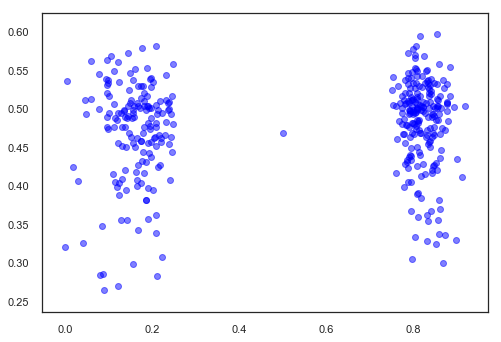

In [554]:
import matplotlib.pyplot as plt
N = 50
x = df_final_drop3['D_R_scale']
y = df_final_drop3['marriage_per']
colors = np.random.rand(N)
plt.scatter(x, y, color='blue', alpha=0.5)
plt.show()